## 任务四	数据集获取

### 步骤 4	导入fastai模块

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.basics import * 

### 步骤 1	加载并预处理数据，路径。

In [3]:
path="./data/Kather_texture_2016_image_tiles_5000"
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


### 步骤 2	查看数据类别。

In [4]:
data.classes

['01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

### 步骤 3	查看前25张数据图像。

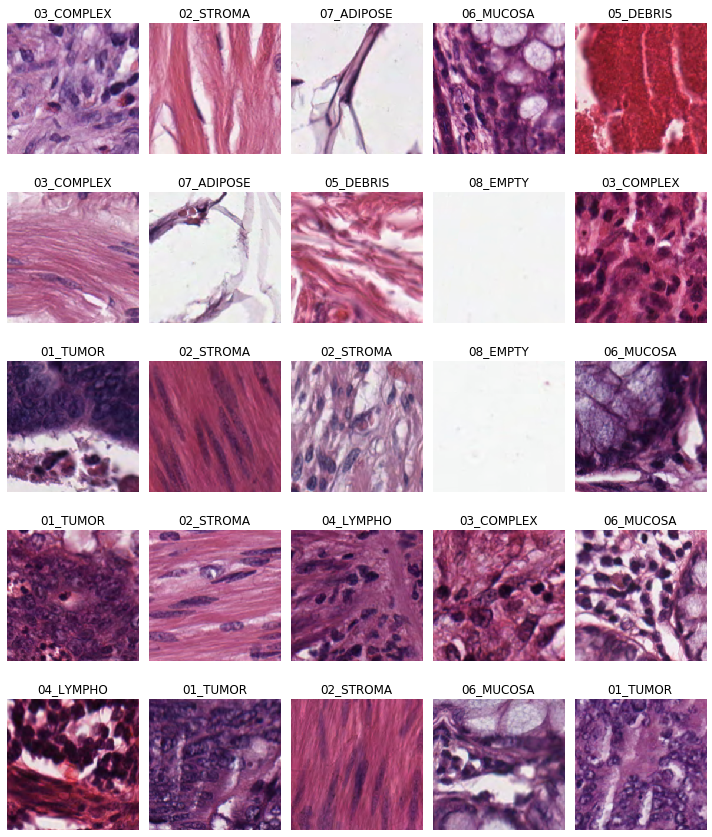

In [5]:
#rows为显示图片的行列数，这里设置5则显示5x5=25张，figsize为画布大小
data.show_batch(rows=5, figsize=(10,12))

### 步骤 4	查看数据集类别名称，类别数量，训练集和验证集数量。

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['01_TUMOR',
  '02_STROMA',
  '03_COMPLEX',
  '04_LYMPHO',
  '05_DEBRIS',
  '06_MUCOSA',
  '07_ADIPOSE',
  '08_EMPTY'],
 8,
 4000,
 1000)

## 任务六	构建模型

### 步骤 1	使用迁移学习，指定网络架构，查看下载路径名称。

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


### 步骤 2	查看模型结构。

In [8]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________

### 步骤 3	训练并保存模型。

In [9]:
# learn.fit_one_cycle(10)
# learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate,time
0,1.282674,0.477057,0.148000,08:57
1,0.671584,0.313008,0.111000,09:17
2,0.464284,0.250292,0.096000,09:02
3,0.356083,0.231558,0.088000,09:06
4,0.316598,0.210784,0.079000,09:11
5,0.275322,0.183573,0.075000,09:08
6,0.247547,0.164986,0.061000,09:07
7,0.232501,0.165346,0.069000,09:08
8,0.213669,0.158249,0.063000,09:09
9,0.196233,0.158949,0.064000,09:06


### 步骤 4	解冻模型，查看模型结构。思考，有什么变化。

In [11]:
learn.load("stage-1")
learn.unfreeze()
print(learn.summary())


Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

## 任务七	寻找最佳学习率

### 步骤 1	寻找最优学习率。

In [12]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


OSError: [Errno 12] Cannot allocate memory

### 步骤 2	使用新的学习率训练，查看错误率曲线。

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(3e-5, 3e-4))
learn.recorder.plot_losses()


### 步骤 3	保存模型。

In [ ]:
learn.save('stage-2')

## 任务八	解读模型

### 步骤 1	解读模型，查看预测错误的样本。

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))


### 步骤 2	查看混淆矩阵。

In [ ]:
interp.plot_confusion_matrix()